In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [177]:
confirmed=pd.read_csv("time_series_covid19_confirmed_global.csv")
recovered =pd.read_csv("time_series_covid19_recovered_global.csv")
death=pd.read_csv("time_series_covid19_deaths_global.csv")

In [178]:
confirmed.index=confirmed["Country/Region"]
recovered.index=recovered["Country/Region"]
death.index=death["Country/Region"]


Total cases: 106.5M
Recovered:   59.4M
Deaths:      2.3M


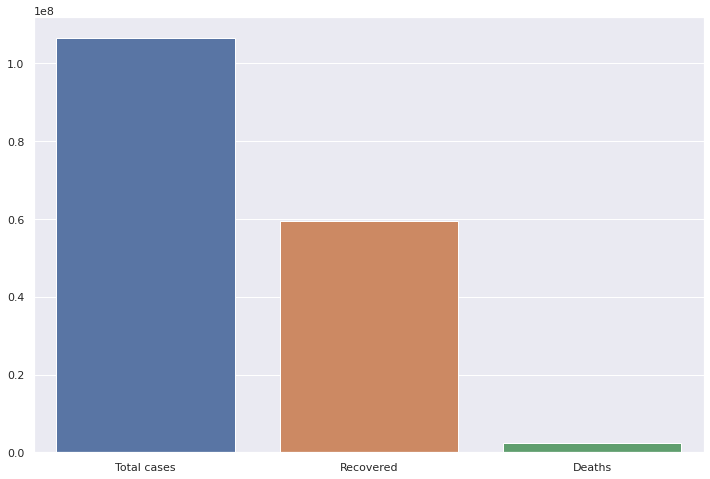

In [179]:
#Worldwide
def worldStats():

    worldConfirmed=confirmed.iloc[:,-1].sum()
    worldRecovered=recovered.iloc[:,-1].sum()
    worldDeath=death.iloc[:,-1].sum()
    
    print ("Total cases: {}M".format(round(worldConfirmed/1000000,1)))
    print ("Recovered:   {}M".format(round(worldRecovered/1000000,1)))
    print("Deaths:      {}M".format(round(worldDeath/1000000,1)))
    
    sns.barplot(x=["Total cases","Recovered","Deaths"],y=[worldConfirmed,worldRecovered,worldDeath])

worldStats()

Total cases in Egypt: 170207
Recovered in Egypt:   132698
Deaths in Egypt:      9699


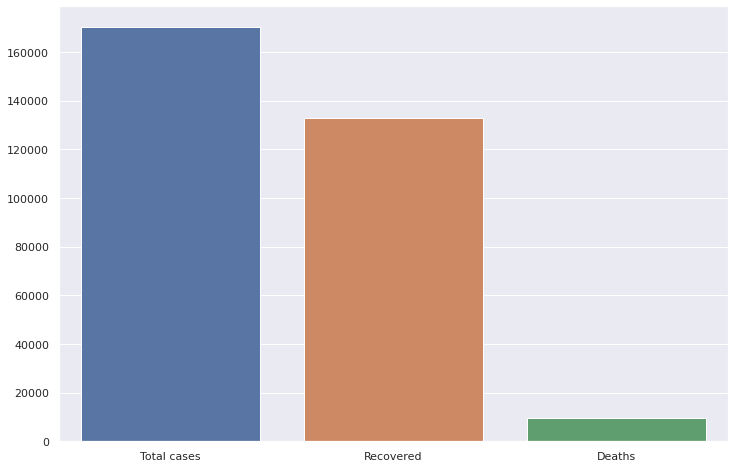

In [180]:
def localStats():
    total=confirmed.iloc[:,-1]["Egypt"]
    localRecovered=recovered.iloc[:,-1]["Egypt"]
    localDeath=death.iloc[:,-1]["Egypt"]
    
    print ("Total cases in Egypt:",total)
    print ("Recovered in Egypt:  ",localRecovered)
    print("Deaths in Egypt:     ", localDeath)
    
    sns.barplot(x=["Total cases","Recovered","Deaths"],y=[total,localRecovered,localDeath])

    
localStats()

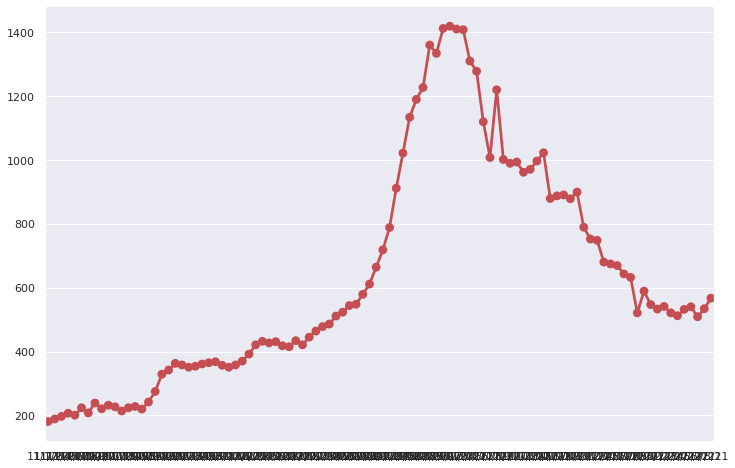

In [187]:
def plotNewCases(n):
    '''plots daily new cases, takes 1 argument: number of days to show'''

    tail=list(confirmed.loc["Egypt"].tail(n+1))
    new=[]
    i=0
    while i<len(tail)-1:
        new.append(tail[i+1]-tail[i])
        i=i+1
    
    t=confirmed.loc["Egypt"].tail(n).index
    sns.pointplot(x=t,y=new,color="r")
    
    
plotNewCases(100)

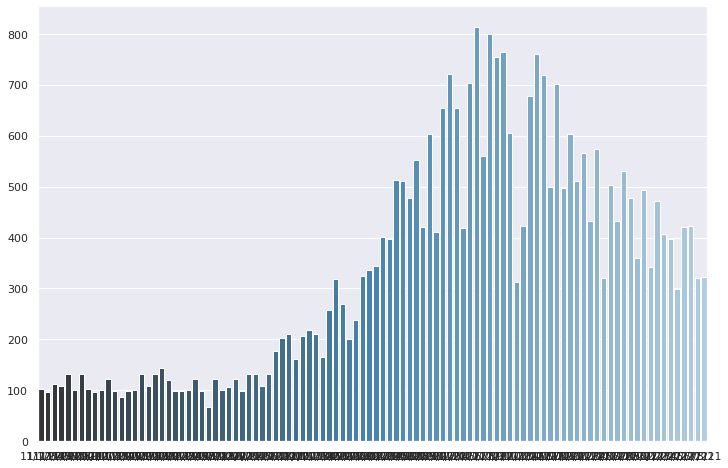

In [186]:
def plotRecovered(n):
    '''plots daily recovery, takes 1 argument: number of days to show'''
    tail=list(recovered.loc["Egypt"].tail(n+1))
    new=[]
    i=0
    while i<len(tail)-1:
        new.append(tail[i+1]-tail[i])
        i=i+1
    
    t=recovered.loc["Egypt"].tail(n).index
    sns.barplot(x=t,y=new,palette="Blues_d")

    
plotRecovered(100)

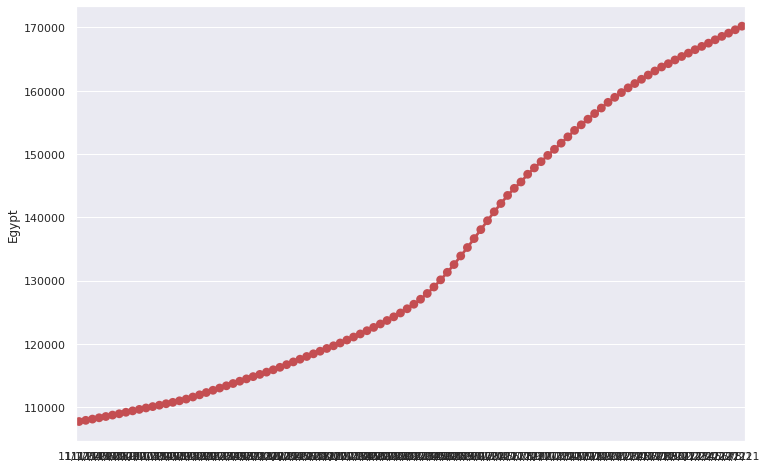

In [185]:
def plotTotal(n):
    """ plots Egypt total cases, takes 1 argument: number of days to show"""
    totaln=confirmed.loc["Egypt"].tail(n)
    sns.pointplot(x=totaln.index,y=totaln,color="r")
    
plotTotal(100)